In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Systemic redshift

In [7]:
z_sys = 0.32768034 #0.32768003 #0.32767963 #0.32767994

In [8]:
np.round(0.32768003+((1+0.32768003)*0.07/3e+5), 8)

0.32768034

# HI

## HI 1215
Get HI 1215 from COS FUV

In [9]:
hi_1215_fuv = ion_transition('HI', 1215, 'H', z_sys, 'FUV')

In [10]:
hi_1215_fuv.grab_ion_transition_info()

In [11]:
hi_1215_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-170],[150,300]])

In [12]:
hi_1215_fuv.cont_norm_flux(v_abs_range=[-45,140], degree=1)

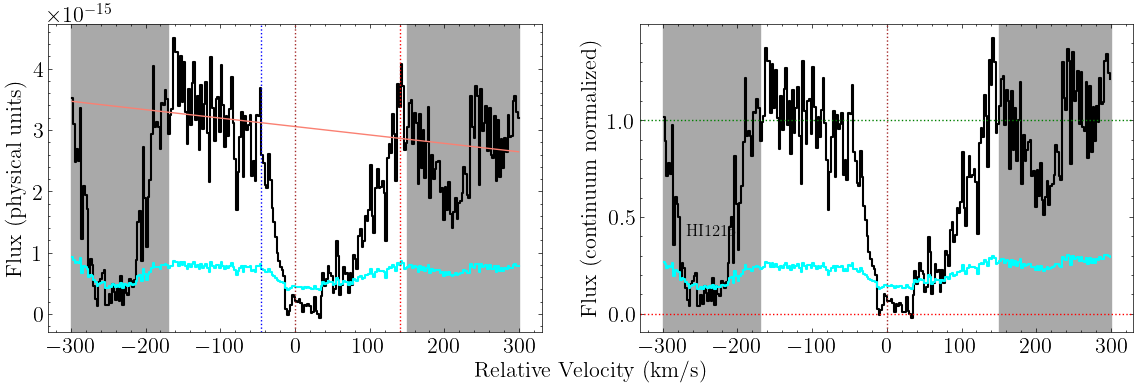

In [13]:
fig, ax = hi_1215_fuv.plot_ion_transition_spec_cont()

In [14]:
hi_1215_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [15]:
hi_1215_fuv.init_ion_transition(init_values = np.array([[14.2,10,0],[14, 40, 35]]), 
                             lsf_convolve = True)

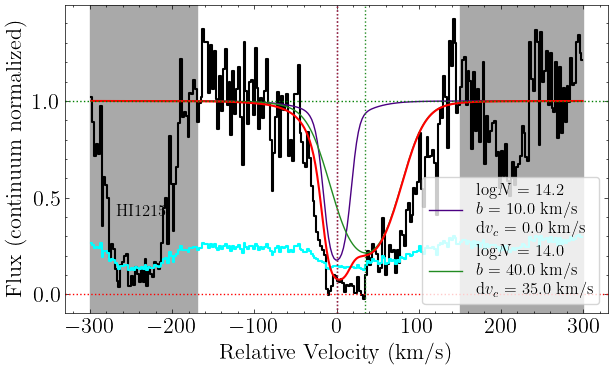

In [16]:
fig, ax = hi_1215_fuv.plot_ion_transition_init_fit()

In [17]:
hi_1215_fuv.fit_ion_transition()

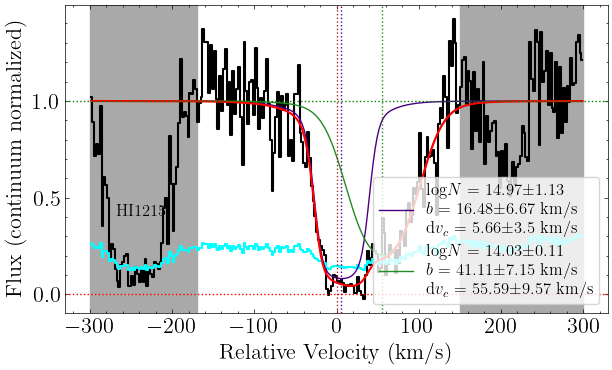

In [18]:
fig, ax = hi_1215_fuv.plot_ion_transition_best_fit()

## HI 972
Get HI 972 from COS FUV

In [19]:
hi_972_fuv = ion_transition('HI', 972, 'H', z_sys, 'FUV')

In [20]:
hi_972_fuv.grab_ion_transition_info()

In [21]:
hi_972_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [22]:
hi_972_fuv.cont_norm_flux(v_abs_range=[-45,85], degree=1)

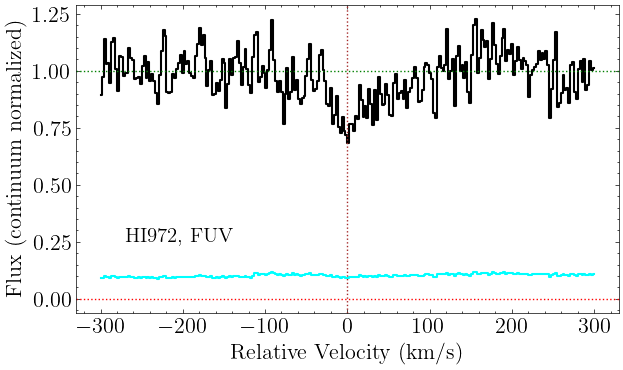

In [23]:
fig, ax = hi_972_fuv.plot_ion_transition_spec()

In [24]:
hi_972_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [25]:
hi_972_fuv.init_ion_transition(init_values = np.array([[14.2,10,0],[14, 40, 35]]), 
                             lsf_convolve = True)

#hi_972_fuv.init_multi_voigt(init_values = hi_1215_fuv.best_values, 
#                             lsf_convolve = True)

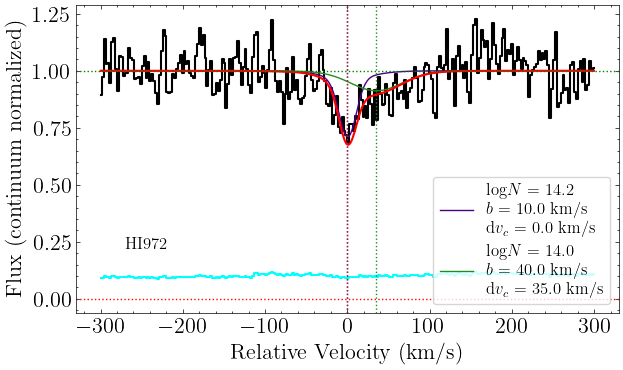

In [26]:
fig, ax = hi_972_fuv.plot_ion_transition_init_fit()

In [27]:
hi_972_fuv.fit_ion_transition()

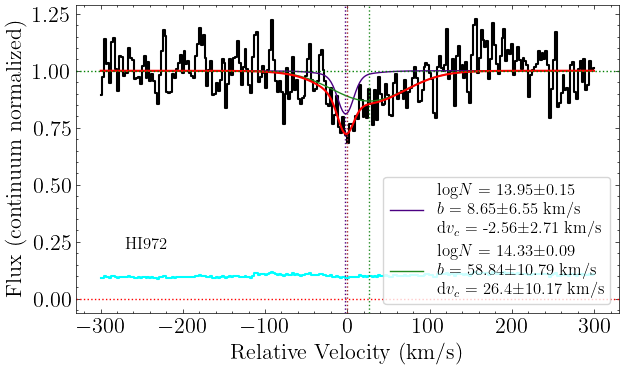

In [28]:
fig, ax = hi_972_fuv.plot_ion_transition_best_fit()

## HI ion
Now compile the HI ion

In [29]:
hi = ion(z_sys, 'HI', [hi_1215_fuv, hi_972_fuv])

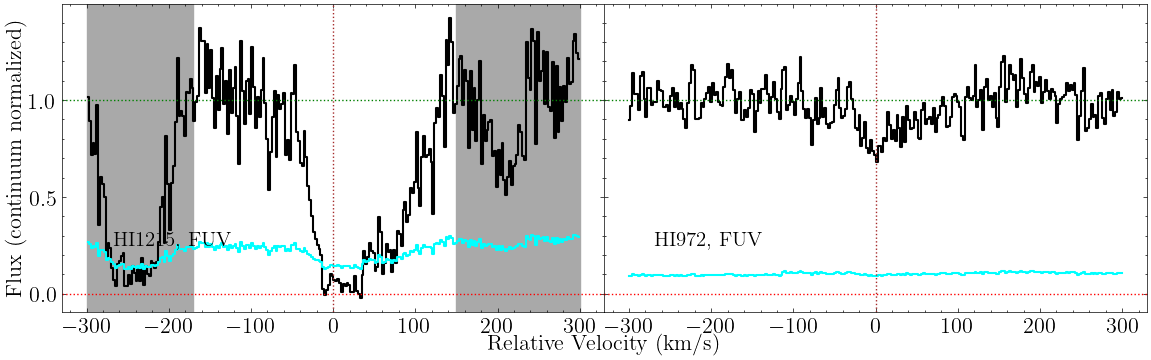

In [30]:
fig, axes = hi.plot_ion()

In [31]:
#hi.init_ion([hi_972_fuv.best_values, hi_972_fuv.best_values])

#hi.init_ion(np.array([[ 14.95422061,  28.70649207, -23.0545877 ],
#       [ 15.10963423,  13.00015786,   5.3594146 ]]))


hi.init_ion([[[14.1, 14, 0], [14.2, 49, 44]],
             [[14.1, 14, 0], [14.2, 49, 44]],])

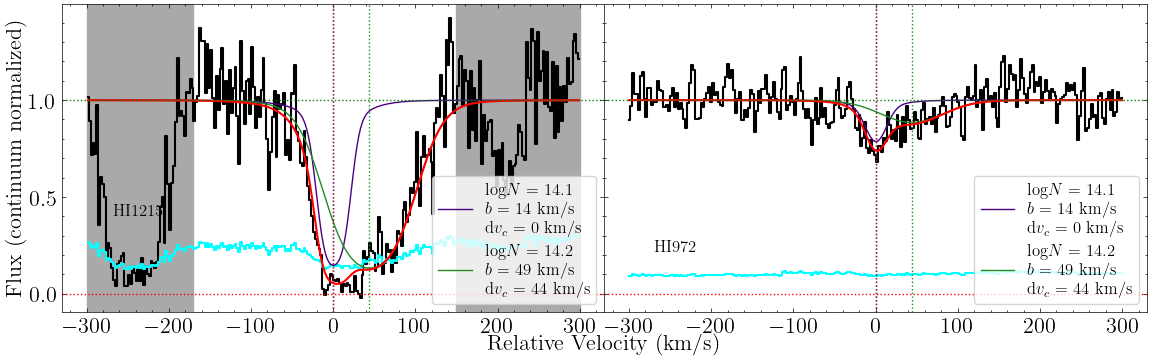

In [32]:
fig, axes = hi.plot_ion_init_fit()

In [33]:
hi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                              ['it1c2_logN', 'it2c2_logN'],
                              ['it1c1_b', 'it2c1_b'],
                              ['it1c2_b', 'it2c2_b'],
                              ['it1c1_dv_c', 'it2c1_dv_c'],
                              ['it1c2_dv_c', 'it2c2_dv_c']],
         lower_bounds_dict = {'it1c1_b': 4}
         #fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c'],
         #lower_bounds_dict={'it1c1_logN':13.5,'it1c1_b':0,
         #                       'it1c2_logN':13.8,'it1c2_b':20},
         #upper_bounds_dict={'it1c1_logN':14.8,'it1c1_b':30,
         #                      'it1c2_logN':15.2,'it1c2_b':100},
          )

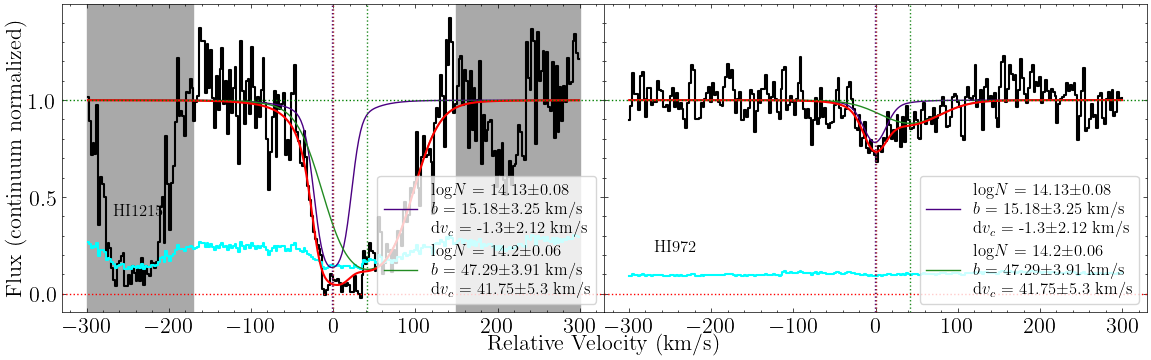

In [34]:
fig, axes = hi.plot_ion_best_fit()

In [35]:
hi.fit_ion_emcee(loaddir=rootdir, n_walkers=200, scale_covar=1e-14, n_steps=5000)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

100%|███████████████████████████████████████| 5000/5000 [11:23<00:00,  7.32it/s]


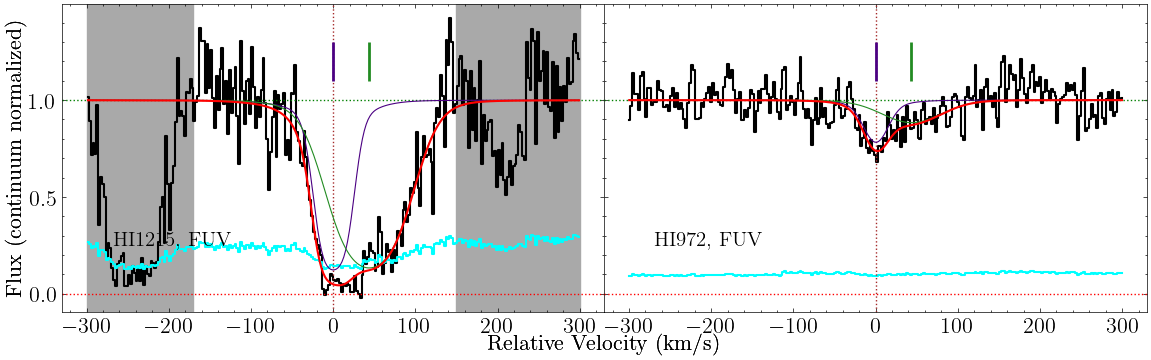

In [36]:
fig, axes = hi.plot_samples()

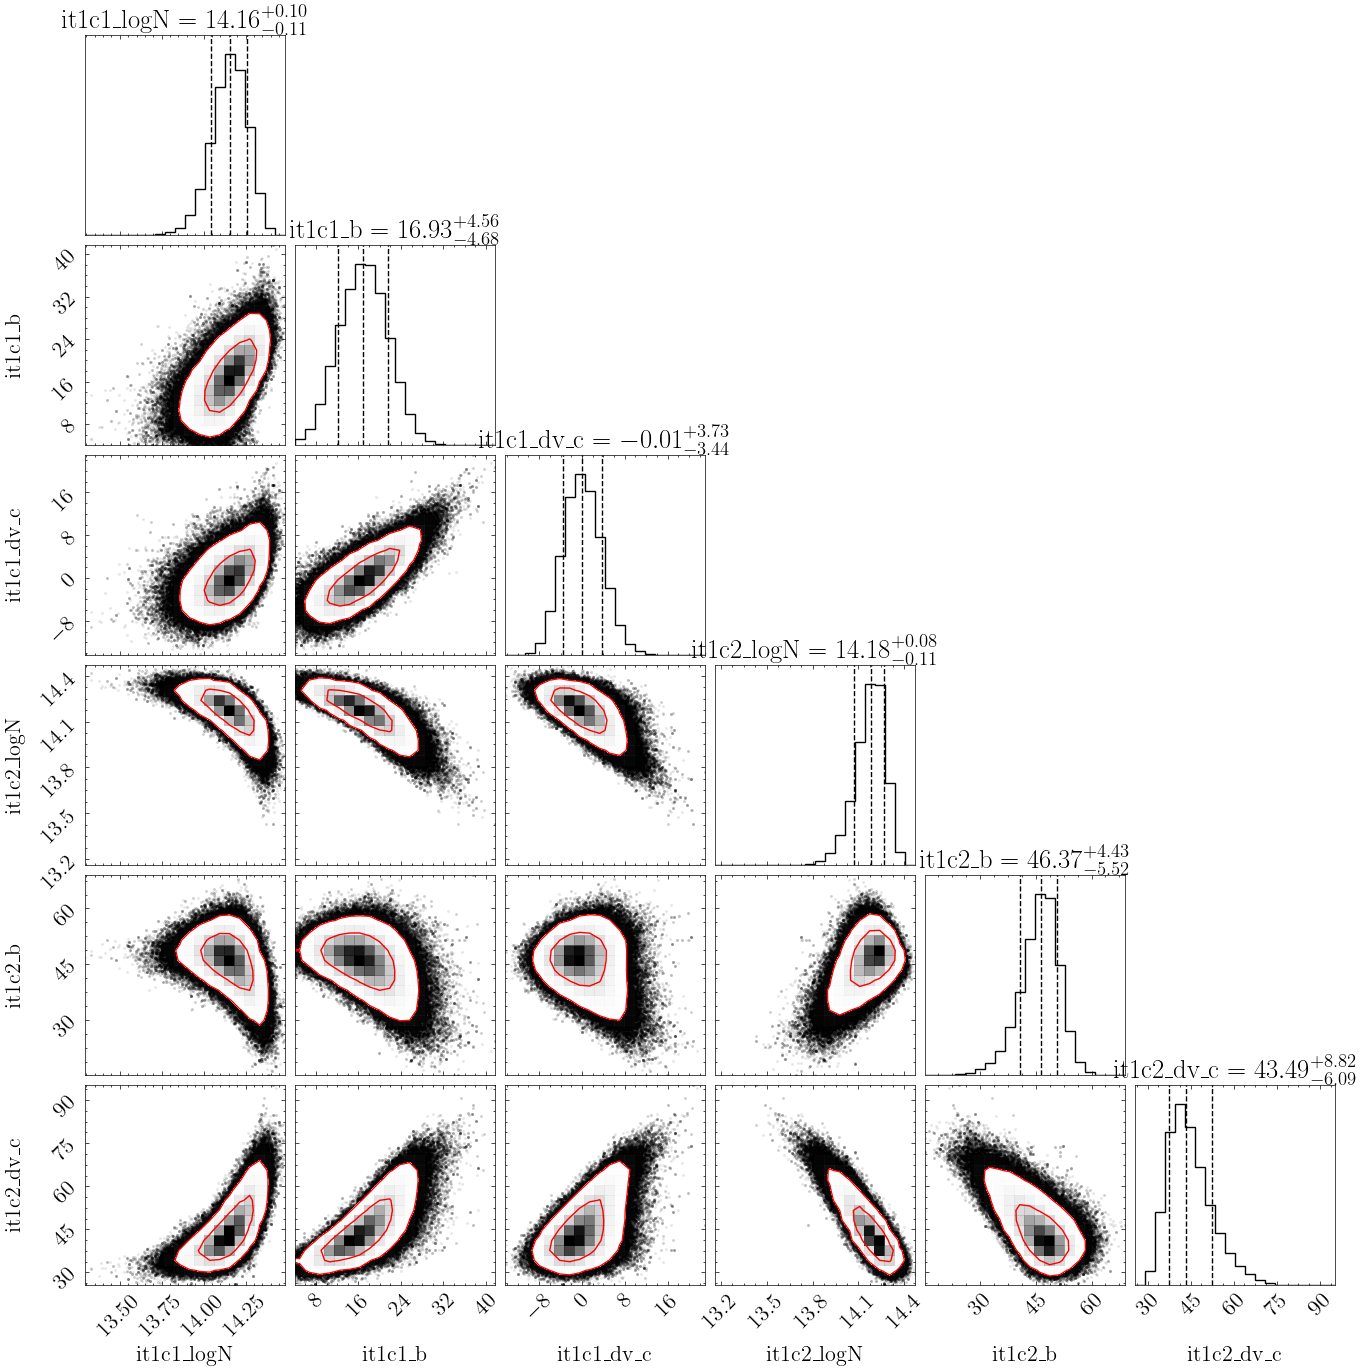

In [37]:
hi.plot_corner()